# Introduction

## Context
Duolingo, one of the most popular language-learning applications, maintains data on users' interactions with the apps' language learning sessions. Second language acquisition is a subject of great importance in psycholinguistic research; understanding what habits contribute to effective learning, how memory is affected, how linguistic nuances of target-language words affect the ability of a learner to master those words, are a few of the general questions surrounding this area of research. My data set, which contains records of user learning for a variety of words, has been in previous work on training a "half-life regression" to measure the "half-life" of a word in a learner's long-term memory. In this study, I aim to determine whether characteristics of the target word, like its part of speech and gender conjugation, as well tendencies of the learning, like time elapsed between sessions and total prior exposure to the word, affect the probability that a student will correctly identify the target word. 

## Research Questions
1. How does the change in probability of recall vary with time elapsed since last study session (are longer periods of inactivity associated with greater forgetfulness?)

2. How likely is a learner who has seen the word frequently in the past to have mastered the word (identify it with 100% accuracy)?

3. Does the part of speech/concrete nature (noun vs not) nature of a word affect probability of recall? 

4. Are words with gender conjugations more difficult to remember?

5. How does the probability of recall vary with how similarly a word appears visually compared with its root word?

## Summary of Findings
Time elapsed between the last study session and the current study session, as well as the similarity of the word to its root word, have statistically significant negative effect on the odds of a user having mastered the word. Whether a word is a noun or is gendered has no statistically significant effect on the change in accuracy between the previous and current sessions. In general, none of the characteristics of interest explain more than a negligible amount of the variation in the data, suggesting that time elapsed between the most recent sessions, characteristics of the word's form like gender and part of speech, total exposure to the word in prior learning, and the similarity of the word's conjugation to its root, are not driving factors in whether or not a learner accurately identifies the word. It is also likely that the data suffers from limitations which may prevent these variables from demonstrating explanatory power. 

## Data Description:

#### What are the observations (rows) and the attributes (columns)? : 
   
Observations are user-word pairs; each observation is associated with a user and the word in their target language that their probability of recalling is based upon. 
Attributes are as follows: 
- p_recall: describes the probability of the user correctly identifying the word presented to them in their Duolingo practice session. The probability of recall is calculated by dividing the number of times they've correctly guessed the word in the current session by the number of times they've seen the word in the current session. 
- ui_language: describes the language to which the user's user interface is set; this measure is a proxy for the user's native language. 
- learning_language: describes the language that the user is learning on Duolingo; it indicates the language of the word in each observation 
- delta: describes the amount of time between the user's most recent session and the prior session 
- timestamp: indicates the time of the user's most recent session 
- history_seen: indicates the number of times the user has encountered the word in all prior sessions
- history_correct: indicates the number of times that the user has correctly identified the word in all prior sessions
- session_seen: indicates the number of times the user has encountered the word in the most recent session 
- session_correct: indicates the number of times the user has correctly identified the word in the most recent session 
- lexeme_id: is a unique id representation of the word studied by the user
- lexeme_string: represents the word studied in string format; it includes the surface form (i.e. the form of the word that the user is presented with), the word's lemma (the root form of the word), as well as tags to indicate the word's part of speech and gender.
- is_gendered: indicates whether the observed word takes on gendered forms (ex: esa/eso in Spanish) or is neutral
- is_noun: indicates whether the observed word is a noun vs other part of speech
- root_word: describes the word's lemma (the root or indefinite form of the word)
- success_rate_delta: describes the absolute value of the change between historical probability of recall and the probability of recall in the current session
- sim_ratio: uses the Levenshtein ratio (fuzzy matching) to measure how "similar" the surface form is to the lemma
    
    
#### Why was this dataset created?: 

- This dataset was created to support "Settles and Meeder 2016. A Trainable Spaced Repetition Model for Language 
    Learning." This paper uses the dataset to create a halflife regression model for language learning. 

#### Who funded the creation of the dataset? : 

- Duolingo, Inc. 

#### What preprocessing was done, and how did the data come to be in the form that you are using?: 

1. Due to the data's size, I processed the original file in chunks of size=500,000, subsetting each chunk to include datapoints on English speakers learning either French or Italian, then created an appended dataset. I checked for any observations with null values (of which I found none). 
2. The formats of the data points and column titles are standardized and appear clean, thus no processing was done to change the format of data points or attribute titles. 
3. I calculated several additional attributes which I added to the dataset. These new attributes are: is_gendered,is_noun, root_word, success_rate_delta, and sim_ratio, delta_x_noun, seen_x_delta, word_mastered.

#### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for? :
    
- In order to use Duolingo, users would have had to agree to a Data Privacy agreement giving Duolingo legal right to access the data; it is reasonable to assume people were not actively aware of data collection as it occurred, but they did legally acknowledge awareness of the possibility of data collection. Expectations for the data's usage were most likely not known before usage. 
    
#### Where can your raw source data be found, if applicable? :

- From the original source: 
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/N8XJME
- My processed source data/code:



## Data Limitations: 
    
1. The ui and learning languages chosen for the dataset exclude data on other ui and learning languages (in particular, there is no data on non-romance languages, thus there is no way to measure recall rates for words in different grammar systems, for example). 


2. No English speakers' share a target language with any of the other ui_languages. It is thus impossible to compare, for example, the difference in recall rates between Spanish and English speakers learning Italian. This would have aided in determining if certain conjugation rules, like gendered words, have a different effect on accuracy for learners whose native language has similar grammar rules vs not.


3. There is no way to determine the average time between sessions; we can only see the time between the last two consecutive sessions per user. The frequency of learning in previous sessions is likely very import, as a learner may have practiced very very frequently in the past while taking a longer break between the last two sessions. In this case, it's reasonable to assume that they are very familiar with the word, even if the break between the most recent sessions was relatively long. 


4. We can't determine how the user is interacting with the target word. Duolingo offers different modes in which to encounter the word; it may show a flashcard, which presents the target word. It may prompt the reader to input the English translation of the target word. It may prompt the learner to input the target word to translate from English. It may also prompt the learner to listen to the target word, correctly identify it audibly, and then write the target word. These different interactions all may significantly affect the likelihood of the user correctly guessing the word,and most likely interact with the variables I test in this study. 

## Pre-Registration Statement

1. Linear Regression to predict the change in probability of recall based on time elapsed between prior and current learning session.

 - This model is aimed at answering the question: Does the amount of time elapsed affect the change in a user's accuracy between the last session and the current session? 
     - Dependent Variables: success_rate_delta
     - Independent Variables: delta, sim_ratio, is_noun, is_gendered, delta_x_noun

2. Logit Regression to determine the of effect exposure of the user to a word on the odds of the user identifying the word with 100% accuracy

 - This model is aimed at answering the question: How are the odds of identifying a word with 100% accuracy in the current session affected by how many times the word has been encountered in previous sessions? 
     - Dependent Variable: word_mastered 
     - Independent Variables: sim_ratio, history_seen, delta, is_noun


In [2]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from fuzzywuzzy import fuzz 
import statsmodels.api as sm
from   sklearn.model_selection import train_test_split
import numpy as np
from   sklearn.linear_model import LinearRegression, LogisticRegression


In [3]:
# load prepared dataset
lingo_df=pd.read_csv('prepped_lingo.csv')
lingo_df.head()



,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,root_word,pos,is_gendered,hist_p_recall,success_rate_delta,is_noun,sim_ratio
0,1.0,1362082530,261691,u:hiS4,fr,en,03a546003e03b545a6d419b6620b3749,la/le<det><def><f><sg>,31,23,1,1,le,det,True,0.741935,0.258065,False,50
1,0.5,1362082530,231391,u:hiS4,fr,en,8bd6d060bb604e17c936418f835d87c8,mon/mon<det><pos><m><sg>,28,27,2,1,mon,det,True,0.964286,0.464286,False,100
2,1.0,1362082530,232832,u:hiS4,fr,en,1b279bb64bd6eba51ab37e4a61aad0c4,mes/mon<det><pos><mf><pl>,2,2,1,1,mon,det,False,1.000000,0.000000,False,33
3,1.0,1362082530,196898,u:hiS4,fr,en,8e6df998cc5c26b86482a3040a5805e2,c'/ce<prn><tn><nt><sg>,19,18,1,1,ce,prn,False,0.947368,0.052632,False,50
4,0.0,1362082530,274171,u:hiS4,fr,en,3ec6ed7d5a122ac3018def0b4f621b12,nouveau/nouveau<adj><m><sg>,6,5,1,0,nouveau,adj,True,0.833333,0.833333,False,100


In [6]:
def logit_model(X,y):
    X = sm.add_constant(X)
    logit=sm.Logit(y.astype(float),X.astype(float)).fit()
    print(logit.summary())
    return logit

def model_plot(model,predictors):
    df = pd.DataFrame({'coef':model.coef_[0]}, index=predictors)
    df.sort_values(by='coef').plot.barh(legend=False)

def ols_model(X_train,y):
    X_train = sm.add_constant(X_train)
    ols=sm.OLS(y.astype(float),X_train.astype(float)).fit()
    return ols


In [7]:
from sklearn.model_selection import train_test_split, cross_val_score

def split_data(predictors, y):
    X_train, X_test, y_train, y_test = train_test_split(
        lingo_df[predictors], 
        lingo_df[y], 
        test_size= 0.3)
    return X_train, X_test, y_train, y_test

# Data Analysis:

## Analysis Section 1:
### Linear Regression to predict the change in probability of recall based on time elapsed between prior and current learning session.

This model is aimed at answering the question: Does the amount of time elapsed affect the change in a user's accuracy between the last session and the current session? The theoretical expectation motivating this question is that longer times between sessions increase forgetfulness, thus the change in accuracy from one session to another will be more negative as the time elapsed increases. 


In [51]:
# Analysis 1: OLS Regression of Change in Probability of Recall
predictors=['delta', 'sim_ratio','is_noun','is_gendered','delta_x_noun']
model=ols_model(lingo_df[predictors],lingo_df['success_rate_delta'])
print(model.summary())

    

                            OLS Regression Results                            
Dep. Variable:     success_rate_delta   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     37.84
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           6.29e-39
Time:                        03:03:56   Log-Likelihood:                -19661.
No. Observations:              100000   AIC:                         3.933e+04
Df Residuals:                   99994   BIC:                         3.939e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0163      0.002     -6.990   

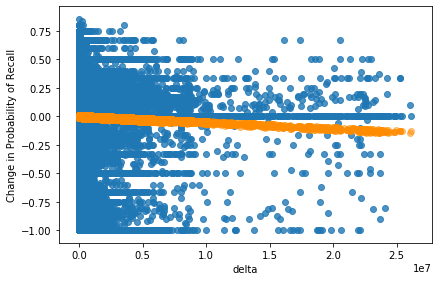

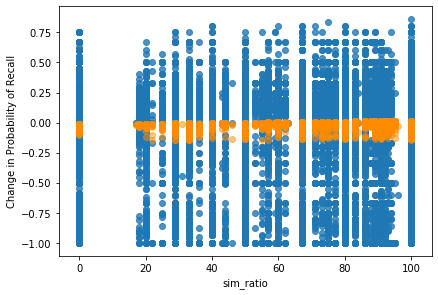

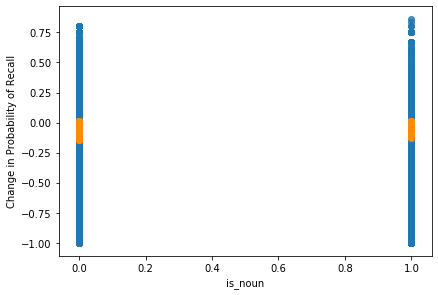

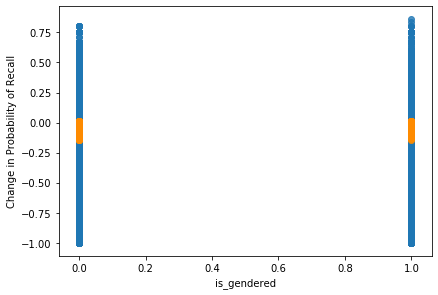

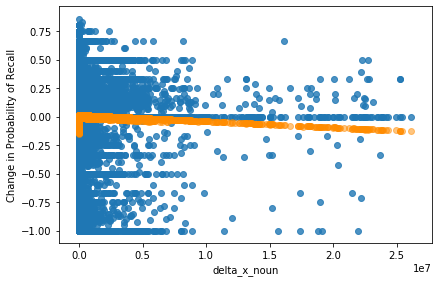

In [63]:
graph_model=LinearRegression().fit(lingo_df[predictors],lingo_df['success_rate_delta'])

for i in range(len(predictors)):

    predictor=predictors[i]
    plt.scatter(lingo_df[predictor], lingo_df.success_rate_delta, alpha=0.8)
    plt.scatter(
        lingo_df[predictor],
        graph_model.predict(lingo_df[predictors]), 
        c='darkorange',
        alpha=0.5
    )
    plt.tight_layout()
    plt.xlabel(predictor)
    plt.ylabel('Change in Probability of Recall')
    plt.show()

In [26]:
#Evaluation: Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(
        lingo_df[predictors], 
        lingo_df['success_rate_delta'], 
        test_size= 0.3)
testing_model=LinearRegression().fit(X_train,y_train)
testing_model.score(X_test, y_test)

0.0009160360455219285

The variables is_noun, is_gendered, and delta_x_noun are not statistically significant. Our model has an incredibly low R^2 value and train-test split score; for the next analysis, I'll run the same OLS regression but exclude the aforementioned statistically insignificant variables to see if our model's fit improves.

In [29]:
# adapted regression for Analysis 1
predictors=['delta', 'sim_ratio']
model=ols_model(lingo_df[predictors],lingo_df['success_rate_delta'])
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     success_rate_delta   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     89.57
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           1.36e-39
Time:                        02:09:44   Log-Likelihood:                -19666.
No. Observations:              100000   AIC:                         3.934e+04
Df Residuals:                   99997   BIC:                         3.937e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0148      0.002     -6.569      0.0

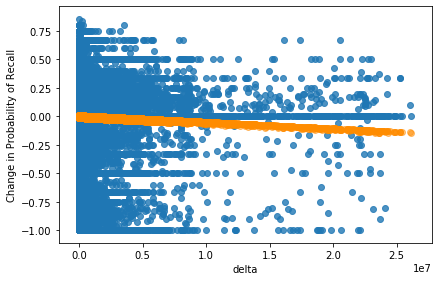

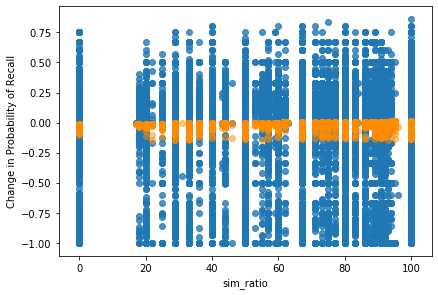

In [30]:
graph_model=LinearRegression().fit(lingo_df[predictors],lingo_df['success_rate_delta'])
for predictor in predictors:
    plt.scatter(lingo_df[predictor], lingo_df.success_rate_delta, alpha=0.8)
    plt.scatter(
        lingo_df[predictor],
        graph_model.predict(lingo_df[predictors]), 
        c='darkorange',
        alpha=0.5
    )
    plt.tight_layout()
    plt.xlabel(predictor)
    plt.ylabel('Change in Probability of Recall')
    plt.show()

In [29]:
# adapted Train-Test split evaluation 
X_train, X_test, y_train, y_test = train_test_split(
        lingo_df[predictors], 
        lingo_df['success_rate_delta'], 
        test_size= 0.3)
testing_model=LinearRegression().fit(X_train,y_train)
testing_model.score(X_test, y_test)

0.0024680939334269514

### Results of Analysis 1
The R-squared value of the first model (0.002) indicates that the independent variables delta, sim_ratio, is_noun, is_gendered, and delta_x_noun explain essentially none of the variation in the data. Additionally, the variables is_noun, is_gendered, and delta_x_noun are all statistically insignificant at a 5% significance level, indicating that they are not associated with a non-random pattern in the success_rate_delta. Variables delta and sim_ratio have a statistically significant but essentially negligible effect on the success_rate_delta (-5.897e-09 and 0.0002 increase in the rate of recall, respectively). In an attempt to produce a model with at least some explanatory power, I removed the statistically insignificant variables from the model. However, the new model, which included only sim_ratio and delta as independent variables, still shows that the model explains essentially none of the variability in the data, with the same R-squared of 0.002 as in the previous model. Both delta and sim_ratio remain statistically significant but practically insignificant. The train-test split model evaluation reinforces the lack of explanatory power of this model, with a score of 0.0025. 

Theoretically, these results indicate that the change in a user's probability of correctly identifying the target from the last session to the current session is not well explained by factors I had anticipated being powerful predictors. In particular, these results suggest that the amount of time elapsed from the last learning session to the current session does not explain how much a user's probability of getting a word correct has increased or decreased since their last session. Theoretically, I would have expected longer lapses of time to result in a larger decrease in the probability of getting a word right in the current session vs the last session (i.e. the longer you go between sessions, the more likely you are to forget the word). Additionally, these results suggest aspects of the word like how different its conjugated form looks compared to its root form, whether or not it has a gendered conjugation, and whether or not it's a noun, all do a negligible job of explaining changes in accuracy between the current session and the last. The effect of the time between the last session and the current session on the change in probability of recall is no different for nouns vs other parts of speech, which we can conclude from the statistical insignificance of the interaction variable delta_x_noun. A limitation that may affect the model is that we have no visibility in the data as to the lapse of time between every learning session, nor the marginal change in accuracy between each session. Having this visibility may have helped in establishing a model with greater explanatory power. 


## Analysis Section 2: 
### Logit Regression to determine the of effect exposure of the user to a word on the odds of the user identifying the word with 100% accuracy

This model is aimed at answering the question: How are the odds of identifying a word with 100% accuracy in the current session affected by how many times the word has been encountered in previous sessions? The theoretical expectation motivating this question is that the more exposure someone has had to a word, all else held constant, the greater their odds of mastering that word and identifying it with 100% accuracy. 


In [21]:

lingo_df['word_mastered']=np.where(lingo_df['p_recall']==1, 1, 0)


I've created this new variable 'word_mastered' to indicate whether or not a user guessed the target word with 100% accuracy in the current session. We will use this variable to train our model and predict the likelihood of a user mastering a word based on the aforementioned criteria.

In [32]:
predictors=['sim_ratio','history_seen','delta','is_noun']
model=logit_model(lingo_df[predictors],lingo_df['word_mastered'])


Optimization terminated successfully.
         Current function value: 0.441391
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          word_mastered   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99995
Method:                           MLE   Df Model:                            4
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                0.003124
Time:                        02:18:10   Log-Likelihood:                -44139.
converged:                       True   LL-Null:                       -44277.
Covariance Type:            nonrobust   LLR p-value:                 1.180e-58
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7691      0.022     79.693      0.000       1.726       1.813
sim_ratio       -0.0027

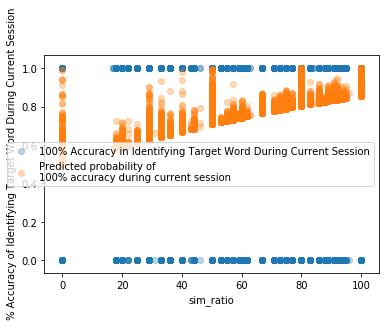

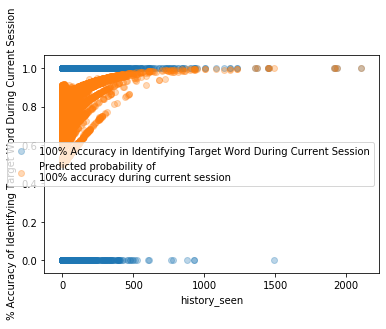

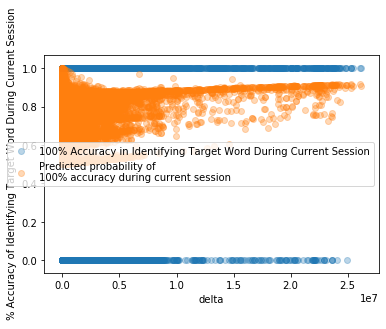

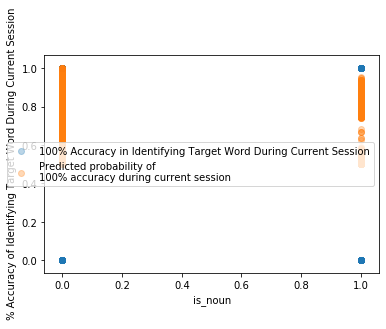

In [40]:
def logit(x):
    return np.exp(x) / (np.exp(x) + 1)

log_reg = LogisticRegression().fit(lingo_df[predictors], lingo_df['word_mastered'])
for predictor in predictors:
    plt.scatter(
        lingo_df[predictor], 
        lingo_df['word_mastered'], 
        alpha = 0.3,
        label='100% Accuracy in Identifying Target Word During Current Session'
    )

    plt.scatter(
        lingo_df[predictor], 
        log_reg.predict_proba(lingo_df[predictors])[:,1], 
        alpha = 0.3,
        label='Predicted probability of\n100% accuracy during current session'
    )
    plt.xlabel(predictor)
    plt.ylabel(' % Accuracy of Identifying Target Word During Current Session')
    plt.legend()
    plt.show()

Evaluation of Model: Train - Test Split

In [42]:
logreg_scores = cross_val_score(
    LogisticRegression(), 
    lingo_df[predictors], 
    lingo_df['word_mastered'], 
    cv=50
)
print(f'Mean cross-validated accuracy: {logreg_scores.mean():.3f}')

#baseline:
print('Baseline accuracy:', round(lingo_df.word_mastered.sum()/len(lingo_df),3))

Mean cross-validated accuracy: 0.838
Baseline accuracy: 0.838


### Results of Analysis 2: 
The R-squared value of 0.003 indicates that the independent variables history_seen, sim_ratio, delta, and is_noun explain essentially none of the variation in the data. All input variables have a statistically significant but essentially negligible effect on the odds of mastering a word. A 1-unit increase in the similarity ratio is associated with 0.0027 times lower odds of mastering the word, 1 more time seeing the word historically is associated with 0.0010 times higher odds of mastering the word, the word being a noun is associated with 0.2316 times higher odds of mastering the word, and a 1-unit increase in time elapsed between previous and current sessions is associated with 3.4e-08 times lower odds of mastering the word. 

Theoretically, these results indicate that the odds of having 100% accuracy in identifying a particular word in the current session is not well explained by factors I had anticipated being powerful predictors. In particular, these results suggest that the number of times the word was encountered in the past does have a statistically significant but not practically significant effect on the odds of 100% accuracy. Theoretically, I would have expected increased exposure to the word to result in much greater odds of 100% accuracy in the present. Again, it would have been helpful to know the average amount of time between sessions in answering this question; for example, if longer periods of time between learning sessions contribute to forgetfulness while seeing the word more times over the history of learning the language increases the likelihood of knowing the word by heart, then the two effects might cancel one another out (ex: If I've seen a word super frequently but I tend to forget it in between sessions where I encounter it, it is hard to tell whether I will show mastery of the word in my current session). 


## Analysis Section 3: 
### Linear Regression to predict the effect of time elapsed between learning sessions on the probability of recalling a word

This model is aimed at answering the question: How is the probability of identifying a word correctly in the current session affected by how much time has elapsed between the previous and current session? The theoretical expectation motivating this question is that the more time that has elapsed, all else held constant, the lower the probability of remembering a word in the current learning session. 



The variable 'seen_x_delta' represents the interaction of the number of times the word has been encountered historically (history_seen) with the time elapsed between the previous and current session (delta).

In [44]:
predictors=['history_seen','delta','seen_x_delta']
model=ols_model(lingo_df[predictors],lingo_df['p_recall'])
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               p_recall   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     26.21
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           6.16e-17
Time:                        02:51:56   Log-Likelihood:                -11789.
No. Observations:              100000   AIC:                         2.359e+04
Df Residuals:                   99996   BIC:                         2.362e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8975      0.001    927.487   

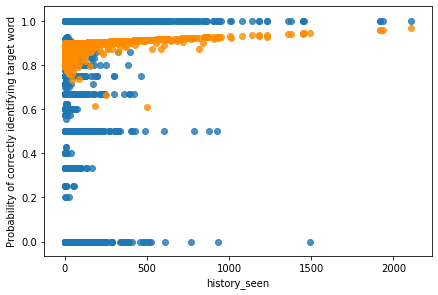

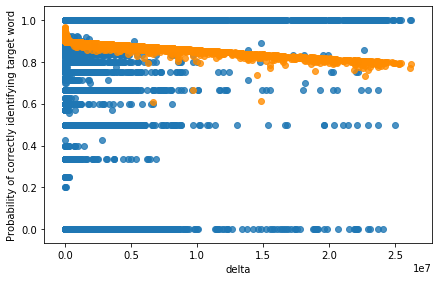

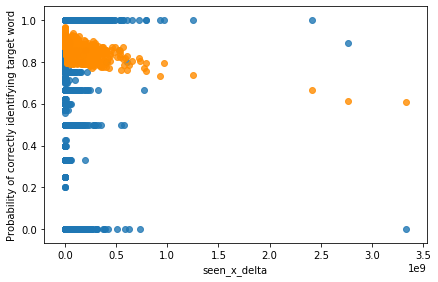

In [45]:
graph_model=LinearRegression().fit(lingo_df[predictors],lingo_df['p_recall'])
for predictor in predictors:
    plt.scatter(lingo_df[predictor], lingo_df.p_recall, alpha=0.8)
    plt.scatter(
        lingo_df[predictor],
        graph_model.predict(lingo_df[predictors]), 
        c='darkorange',
        alpha=0.8
    )
    plt.tight_layout()
    plt.xlabel(predictor)
    plt.ylabel('Probability of correctly identifying target word')
    plt.show()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
        lingo_df[predictors], 
        lingo_df['p_recall'], 
        test_size= 0.3)
testing_model=LinearRegression().fit(X_train,y_train)
testing_model.score(X_test, y_test)

0.0005698081217383466

### Results of Analysis 3
The R-squared value of 0.001 indicates that the independent variables history_seen, delta, and the interaction of history_seen and delta explain essentially none of the variation in the data. Only delta has a statistically significant but practically negligible effect on the current probability of recalling the word. A 1-unit increase in the time between the last session and the current session (delta)  is associated with a 3.277e-05 lower probability of recall in the current session.  

Theoretically, these results indicate that the probability of recalling a word in the current session is not well explained by factors I had anticipated being powerful predictors. In particular, these results suggest that the number of times the word was encountered in the past does not have a statistically significant nor practically significant effect on the probability of recall. Theoretically, I would have expected increased exposure to the word to result in a higher probability of recalling the word. It does make theoretical sense that an increased amount of time between the previous and current sessions would have a negative effect on the probability of recall, but the practical insignificance of this result suggests that the time elapsed between sessions does not explain practically any variation in the probability of recall. 
